In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [43]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

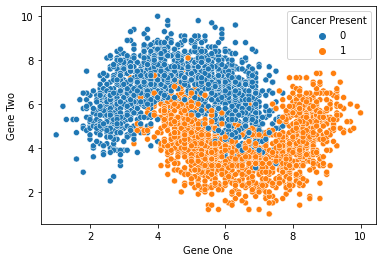

In [44]:
sns.scatterplot(data=df, x='Gene One',y='Gene Two',hue='Cancer Present')

(4.0, 8.0)

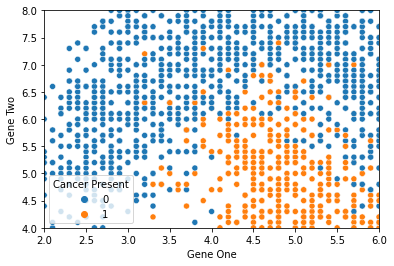

In [45]:
sns.scatterplot(data=df, x='Gene One',y='Gene Two',hue='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
X = df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
y_pre = knn_model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(confusion_matrix(y_test,y_pre))

[[424  46]
 [ 49 381]]


In [22]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [75]:
scaler = StandardScaler()

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [78]:
operation = [('scaler',scaler),('knn',knn)]

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
pipe = Pipeline(steps=operation)

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
k_values = list(range(1,20))

In [83]:
param_grid = {'knn__n_neighbors':k_values}

In [84]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,
                                 scoring='accuracy')

In [85]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [86]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [88]:
full_predictions = full_cv_classifier.predict(X_test)

In [89]:
print(classification_report(y_test,full_predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [90]:
new_patient = [[3.8,6.4]]

In [92]:
full_cv_classifier.predict(new_patient)

/Users/boqianli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [93]:
full_cv_classifier.predict_proba(new_patient)

/Users/boqianli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])